#Proyecto Final Métodos Computacionales
##Identificación de arritmias cardiacas
##Juan Sebastián Díaz Boada  201127333

#Introducción
La señales fisiológicas, tales como el electrocardiograma (ECG), el electroencefalograma (EEG), electromiografía (EMG) y elecrooculograma (EOG), entre otros, son de considerable importancia en el diagnóstico de patologías. Muchas veces el especialista no puede diagnosticar al paciente por medio de los métodos tradicionales, por lo cual debe recurrir a la ayuda de las herramientas tecnológicas. El análisis de señales fisiológicas es una de esas herramientas, con aplicación de diagnosticos en distintas ramas de la medicina, incluyendo desordenes de sueño, apnea obstructiva, sindrome del tunel carpal y, como en este caso, arritmias cardiacas.<BR>

Este proyecto busca usar las herramientas aprendidas en clase de procesamiento de señales para
analizar una señal fisiológica, específicamente una señan de ECG. Usando los
paquetes de `fft` de `scipy`, se busca tratar la señal obtenida y analizar los cambios en la frecuencia
a lo largo del tiempo para determinar arritmias.<BR>
La señal será descargada de [Physiobank](http://www.physionet.org/physiobank/) en formato de texto, y tratada con expresiones regulares.<BR>
+ **Objetivos Primario**<BR>
Determinar los momentos en los que el paciente sufre *arritmias cardiacas*.<BR>
+ **Objetivos Secundarios**<BR>
   + Aprender aplicaciones medicas de los paquetes `fft` de `scipy`.
   + Familiarizarse con conceptos como *frecuencia, tacograma, espectro, ruido* y *filtro*.
   + Tener conceptos básicos del software WFDB disponble para linux y su instalación.


In [1]:
%pylab inline
from IPython.display import HTML
from scipy.signal import *
from scipy.fftpack import *

Populating the interactive namespace from numpy and matplotlib


#Metodología

1. **Instalar software de Señales**<BR>
Para obtener la señal fisiológica en un archivo de texto, se debe instalar un software en linux desde la terminal. Para ello se deben seguir los pasos mostrados en la pagina de [WaveForm DataBase for GNU/Linux](http://www.physionet.org/physiotools/wfdb-linux-quick-start.shtml). Estos pasos son:<BR><BR>

   + Instalar Prerrequisitos:
```
sudo apt-get install gcc libcurl4-openssl-dev libexpat1-dev
```
   + Descargar sl software:
```
tar xfvz wfdb.tar.gz
```
   + Instalar y verificar:
```
cd wfdb-10.m.n
./configure
make install
make check
```

2. **Descargar la señal de ECG**<BR>
Se escoge descargar la señal *MLII* de la grabación 100 de la base de datos *MIT-BIH de Arritmia* (El nombre *MLII* indica la ubicación de los electrodos al medir la señal).<BR>
Para esto se usa el comando `rdsamp` del software recien descargado. Se usa de la siguiente manera:<BR>
```
rdsamp -r mitdb/100 -c -H -P -s MLII>100.csv
```
-Pm para minutos<BR>
Este comando exporta la señal en milivoltios y segundos, usando una alta resolución en formato *csv*.

In [2]:
ECG1=genfromtxt('100.csv',delimiter=",")
ECG2=genfromtxt('119.csv',delimiter=",")

In [3]:
#se escogen los 10 primeros minutos
t1=ECG1[0:216000,0]#en segundos
V1=ECG1[0:216000,1]#en miliVolts
t2=ECG2[0:216000,0]#en segundos
V2=ECG2[0:216000,1]#en miliVolts
fs=360 #Hz
dt=1/fs
N=len(V1)

#Prueba con otra función

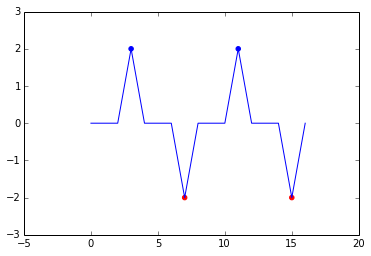

In [4]:
import sys
def peakdet(v, delta, x = None):
    """
    Converted from MATLAB script at http://billauer.co.il/peakdet.html
    
    Returns two arrays
    
    function [maxtab, mintab]=peakdet(v, delta, x)
    %PEAKDET Detect peaks in a vector
    %        [MAXTAB, MINTAB] = PEAKDET(V, DELTA) finds the local
    %        maxima and minima ("peaks") in the vector V.
    %        MAXTAB and MINTAB consists of two columns. Column 1
    %        contains indices in V, and column 2 the found values.
    %      
    %        With [MAXTAB, MINTAB] = PEAKDET(V, DELTA, X) the indices
    %        in MAXTAB and MINTAB are replaced with the corresponding
    %        X-values.
    %
    %        A point is considered a maximum peak if it has the maximal
    %        value, and was preceded (to the left) by a value lower by
    %        DELTA.
    
    % Eli Billauer, 3.4.05 (Explicitly not copyrighted).
    % This function is released to the public domain; Any use is allowed.
    
    """
    maxtab = []
    mintab = []
       
    if x is None:
        x = arange(len(v))
    
    v = asarray(v)
    
    if len(v) != len(x):
        sys.exit('Input vectors v and x must have same length')
    
    if not isscalar(delta):
        sys.exit('Input argument delta must be a scalar')
    
    if delta <= 0:
        sys.exit('Input argument delta must be positive')
    
    mn, mx = Inf, -Inf
    mnpos, mxpos = NaN, NaN
    
    lookformax = True
    
    for i in arange(len(v)):
        this = v[i]
        if this > mx:
            mx = this
            mxpos = x[i]
        if this < mn:
            mn = this
            mnpos = x[i]
        
        if lookformax:
            if this < mx-delta:
                maxtab.append((mxpos, mx))
                mn = this
                mnpos = x[i]
                lookformax = False
        else:
            if this > mn+delta:
                mintab.append((mnpos, mn))
                mx = this
                mxpos = x[i]
                lookformax = True
 
    return array(maxtab), array(mintab)
 
if __name__=="__main__":
    from matplotlib.pyplot import plot, scatter, show
    series = [0,0,0,2,0,0,0,-2,0,0,0,2,0,0,0,-2,0]
    maxtab, mintab = peakdet(series,.3)
    plot(series)
    scatter(array(maxtab)[:,0], array(maxtab)[:,1], color='blue')
    scatter(array(mintab)[:,0], array(mintab)[:,1], color='red')
    show()

In [6]:
mapic,mipic=peakdet(V1,0.5,t1)

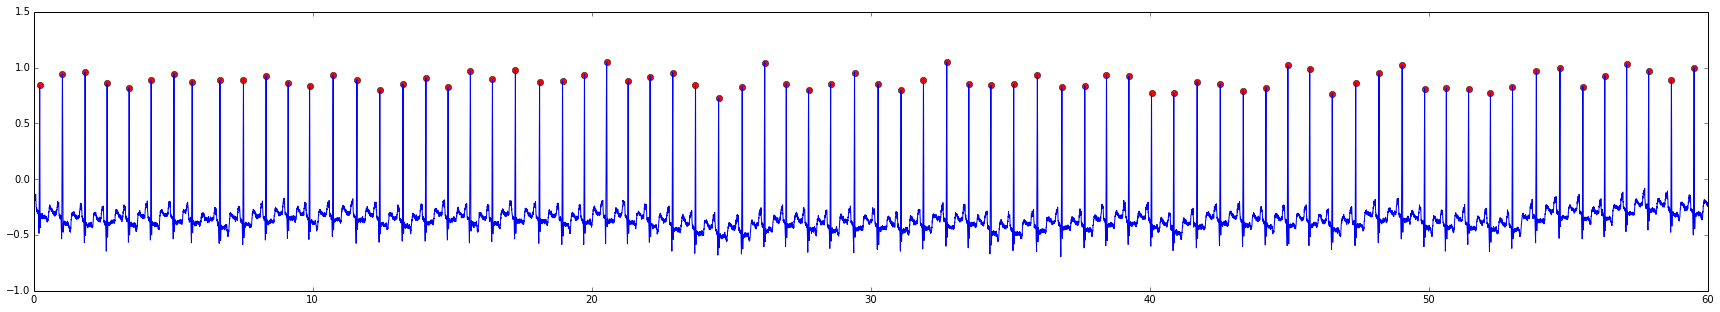

In [7]:
figure(figsize=(30,5))
plot(mapic[0:74,0],mapic[0:74,1],'ro')
plot(t1[0:21600],V1[0:21600])

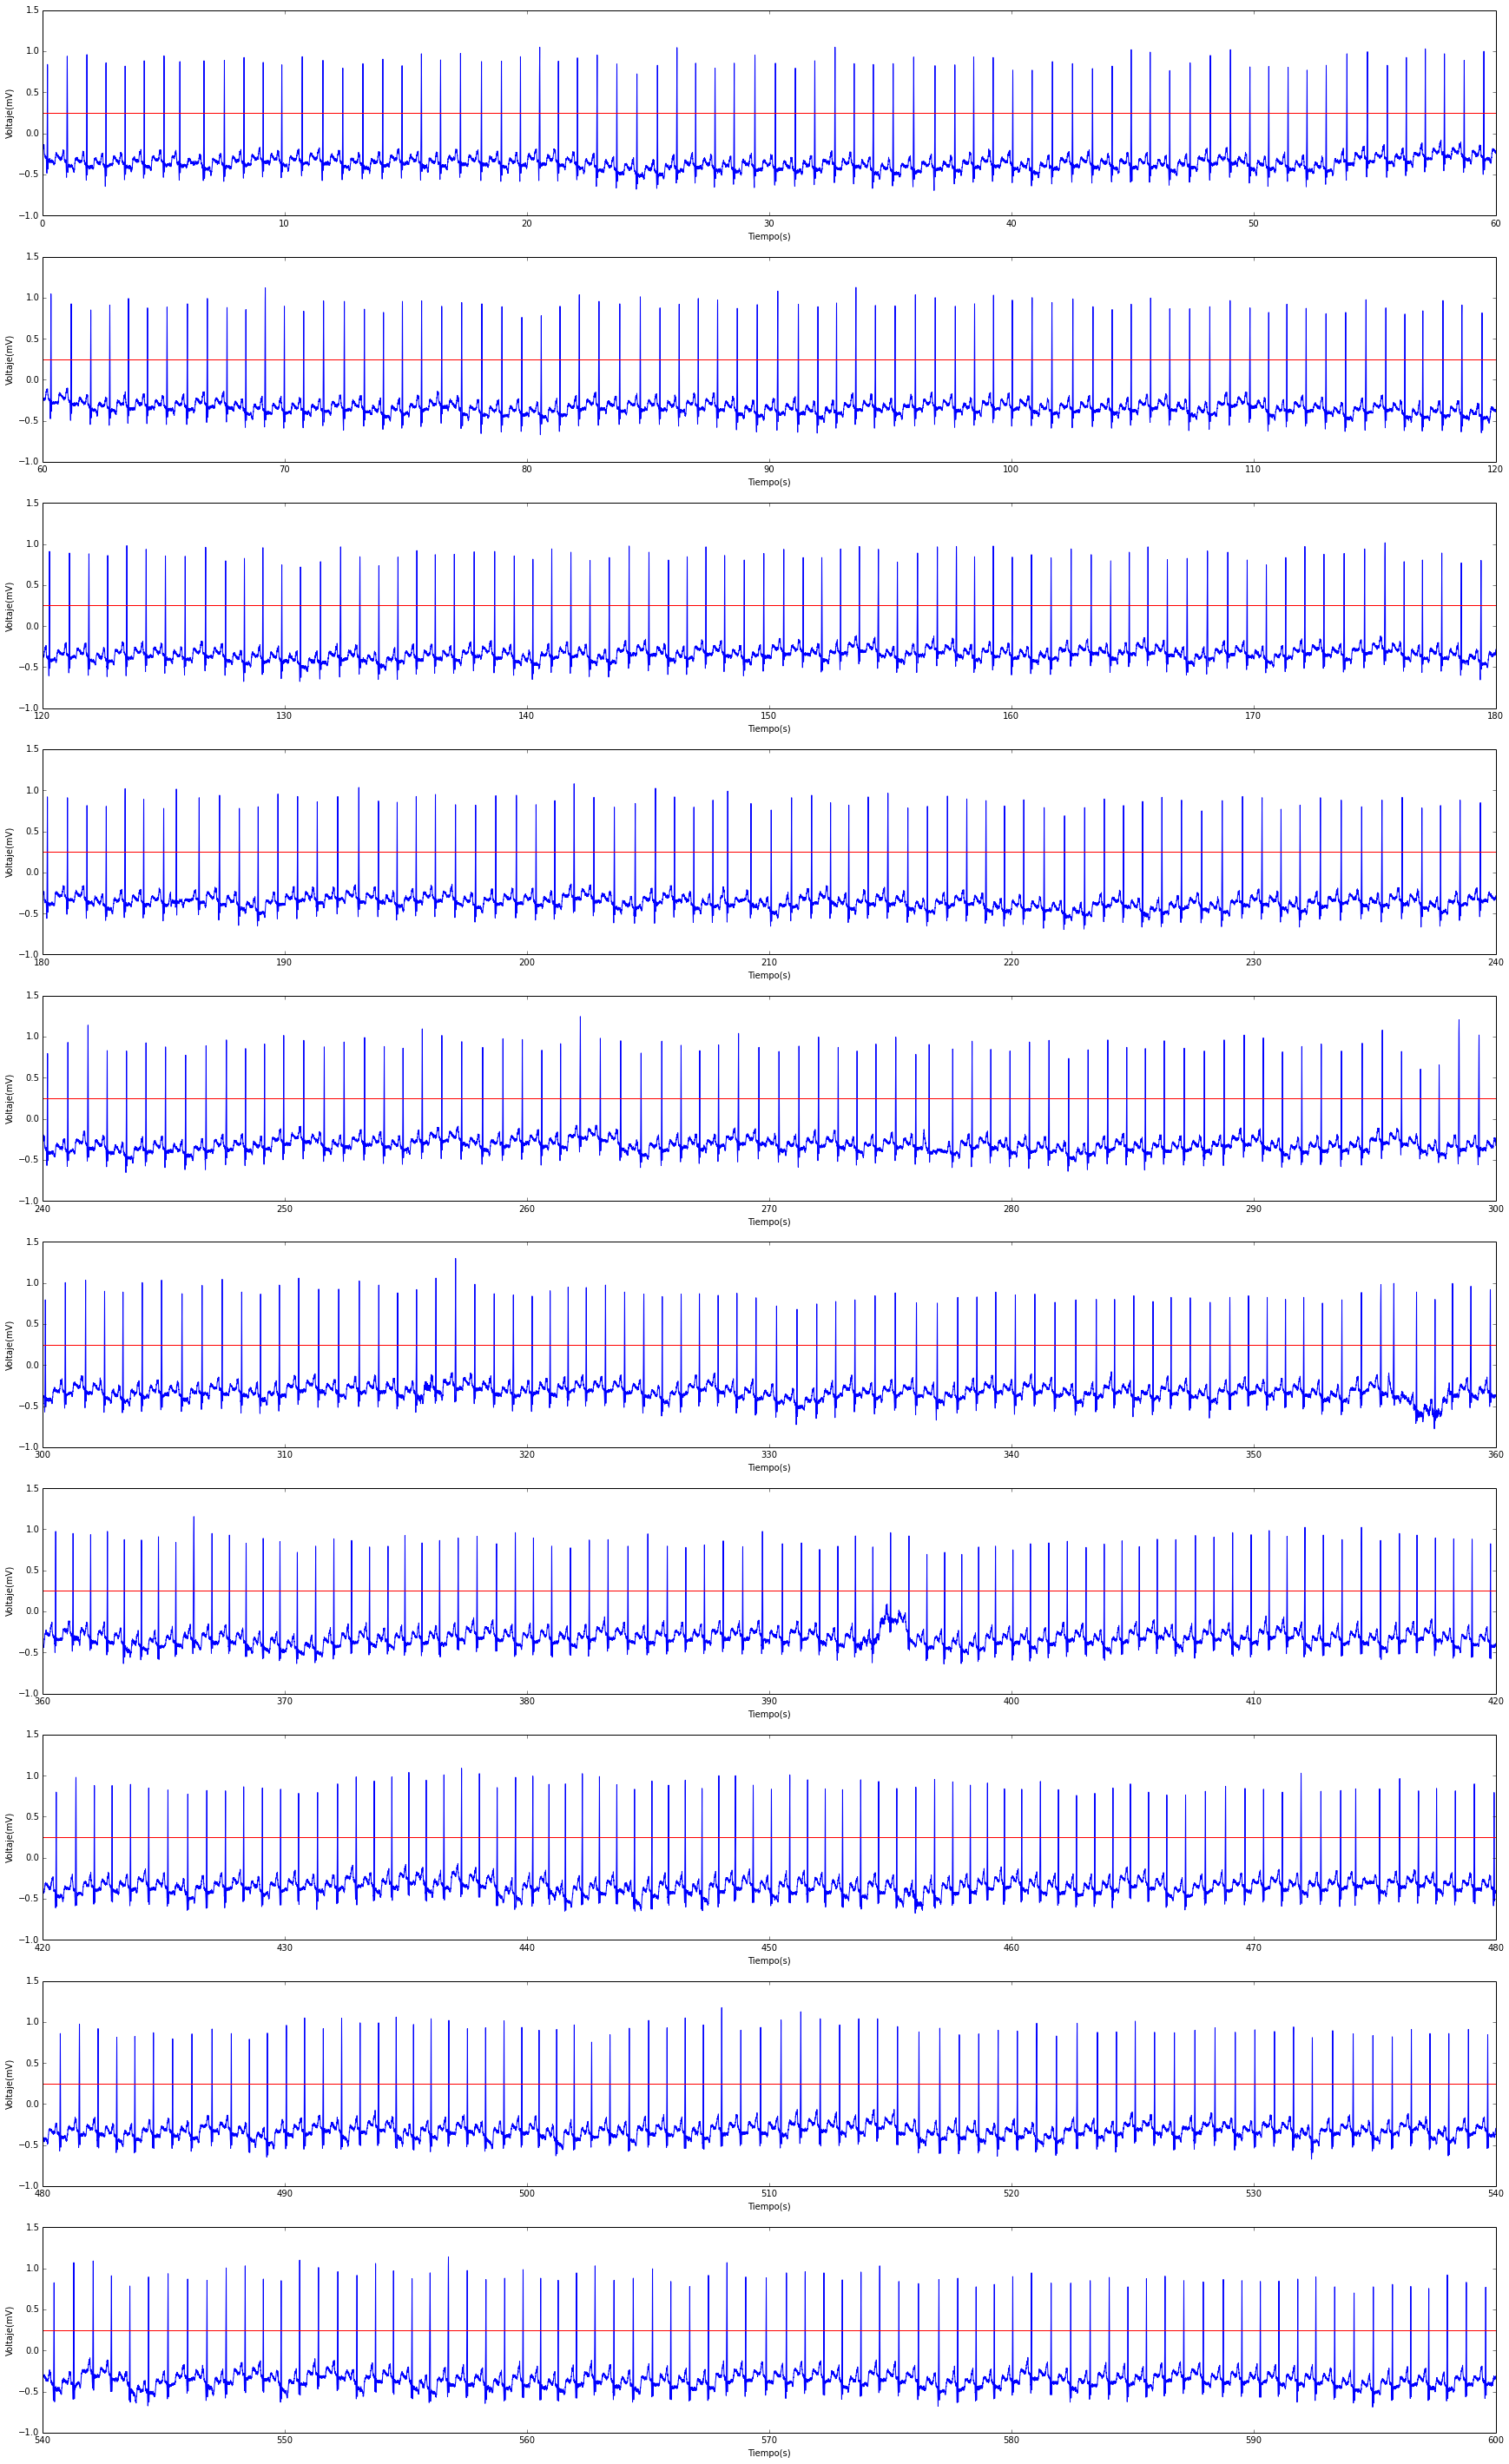

In [8]:
figure(figsize=(30,50))
for i in range(10):
    subplot(10,1,i+1)
    xlim(60*i,(i+1)*60)
    xlabel('Tiempo(s)')
    ylabel('Voltaje(mV)')
    plot (t1,V1)
    axhline(0.25,color='r')

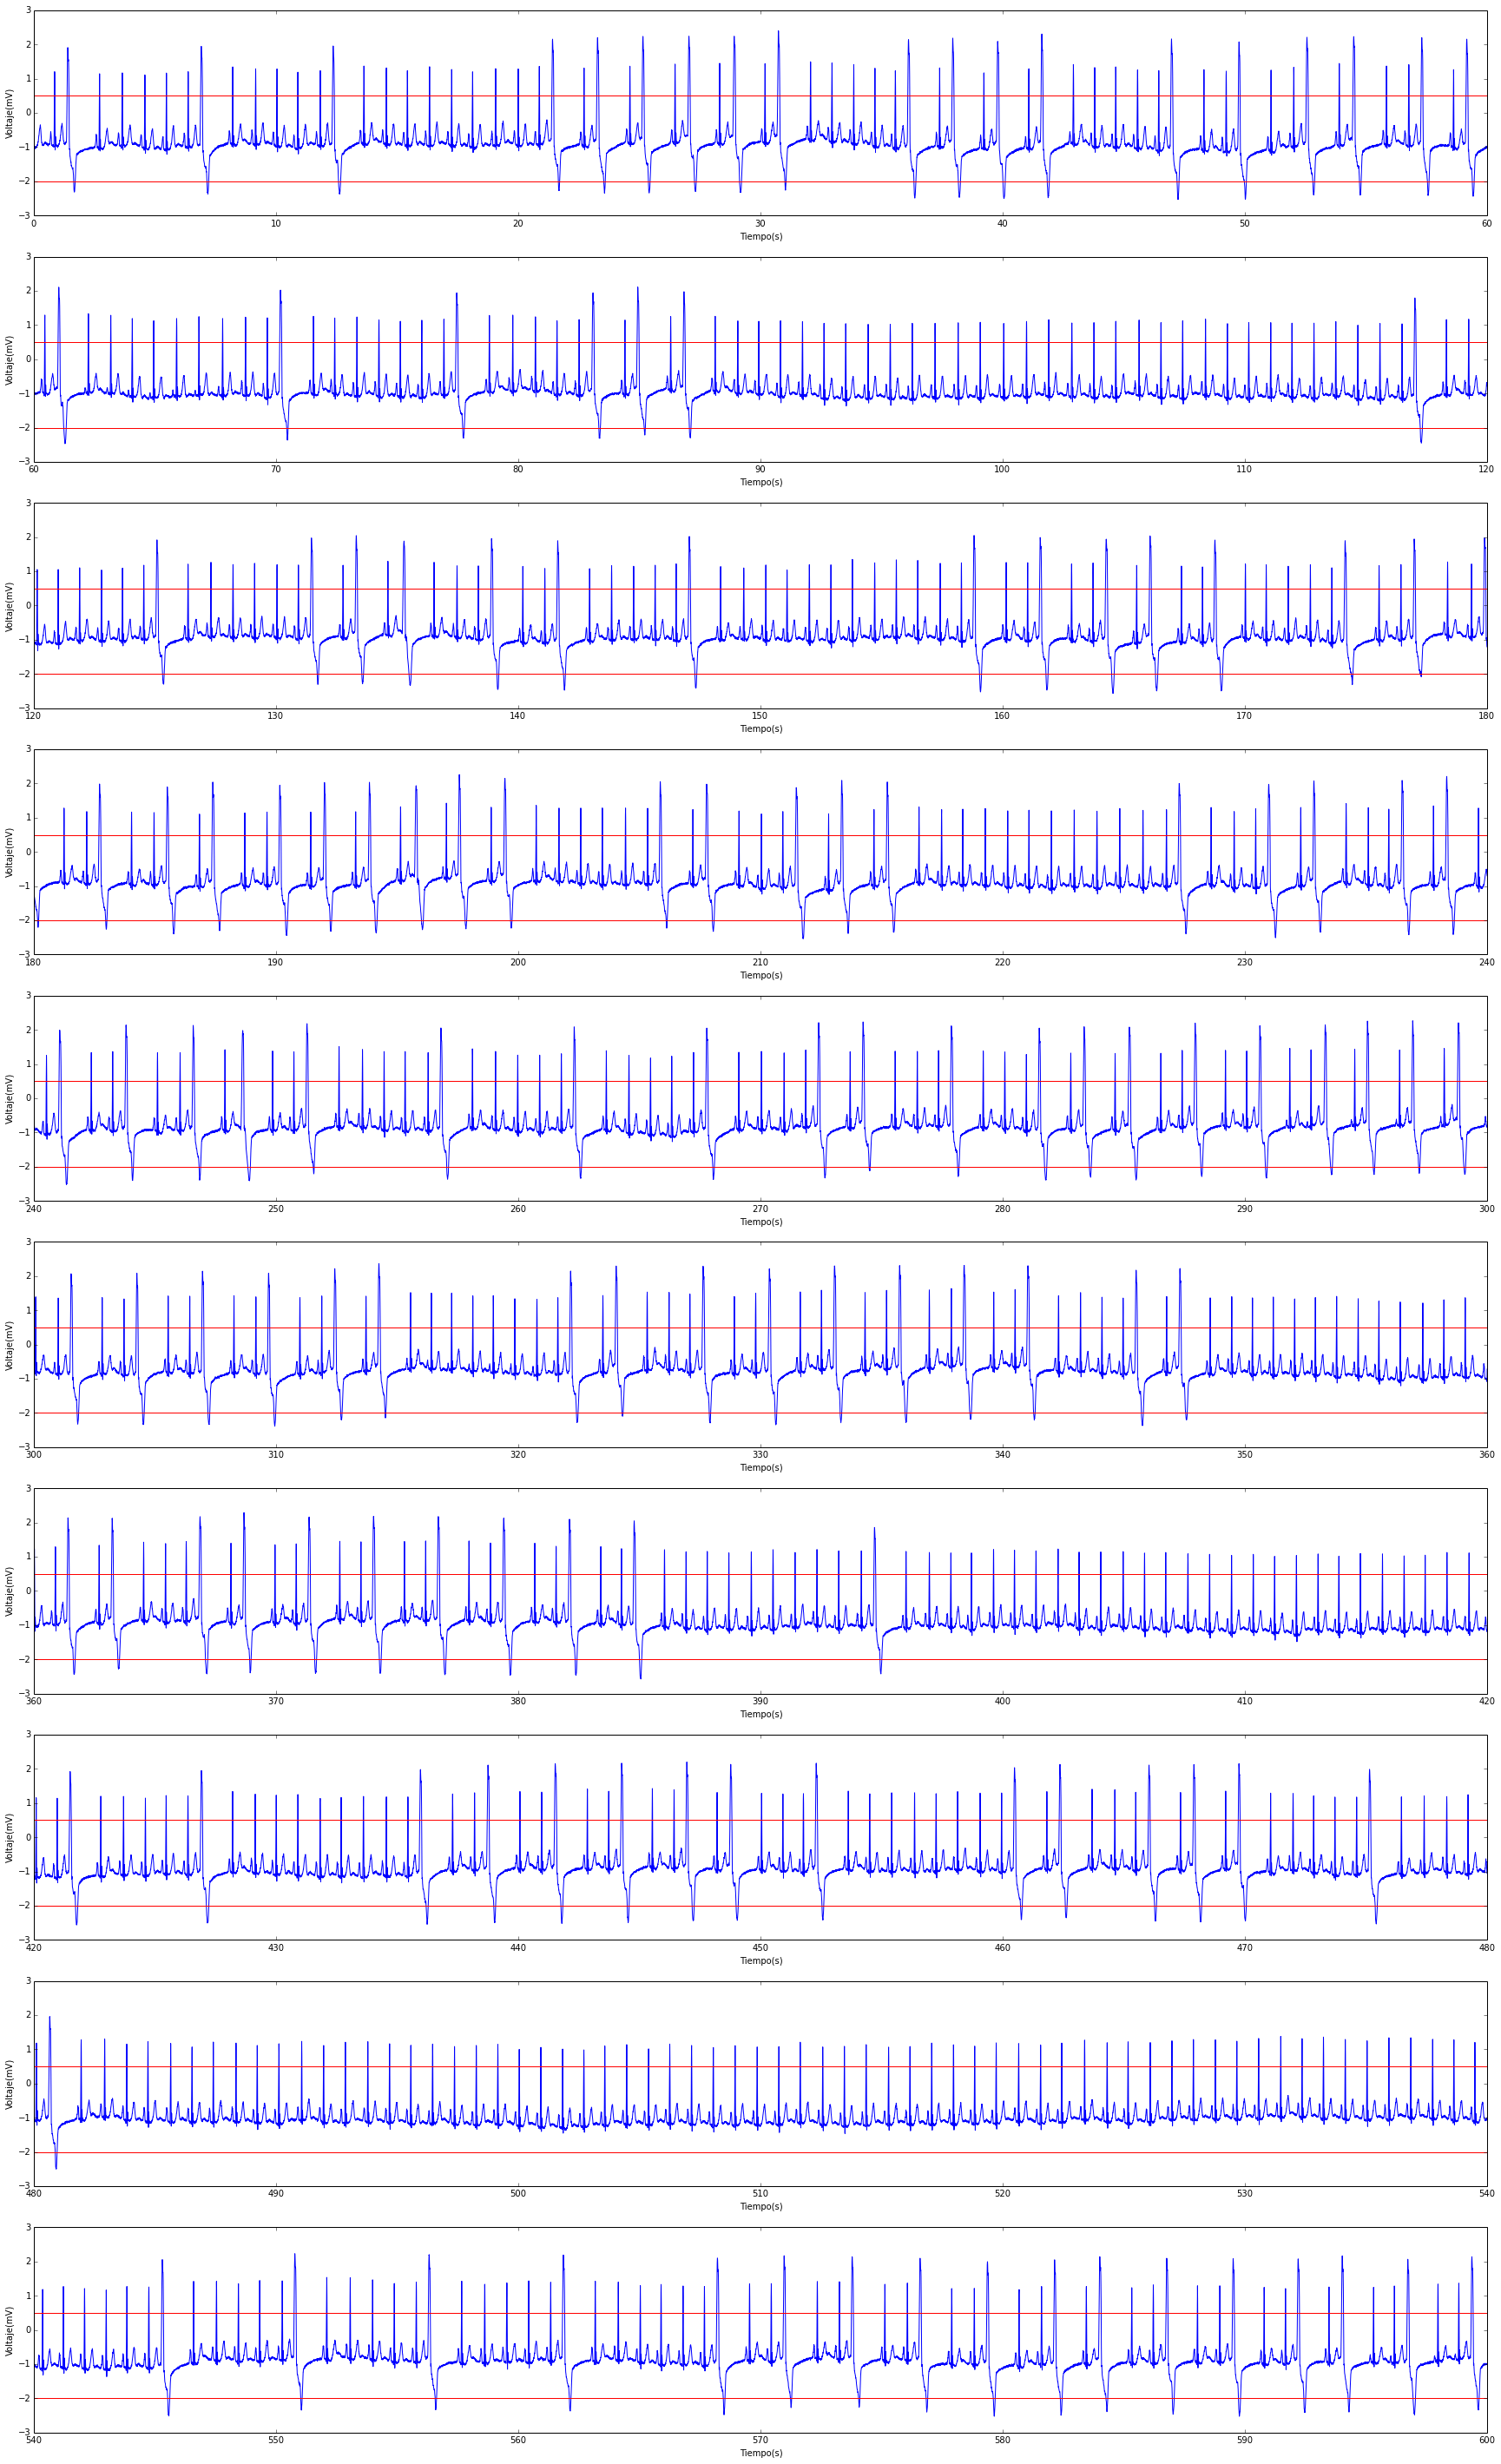

In [9]:
figure(figsize=(30,50))
for i in range(10):
    subplot(10,1,i+1)
    xlim(60*i,(i+1)*60)
    xlabel('Tiempo(s)')
    ylabel('Voltaje(mV)')
    plot (t2,V2)
    axhline(0.5,color='r')
    axhline(-2, color='r')

In [10]:
new1=V1
new2a=V2
new2b=-V2
for i in range(len(new1)):
    if (new1[i]<0.25):
        new1[i]=0.25
    if(new2b[i]<2):
        new2b[i]=2
    if(new2a[i]<0.5):
        new2a[i]=0.5

In [12]:
ar=arange(1,10)
p1=find_peaks_cwt(new1,ar)
p2a=find_peaks_cwt(new2a,ar)
p2b=find_peaks_cwt(new2b,ar)

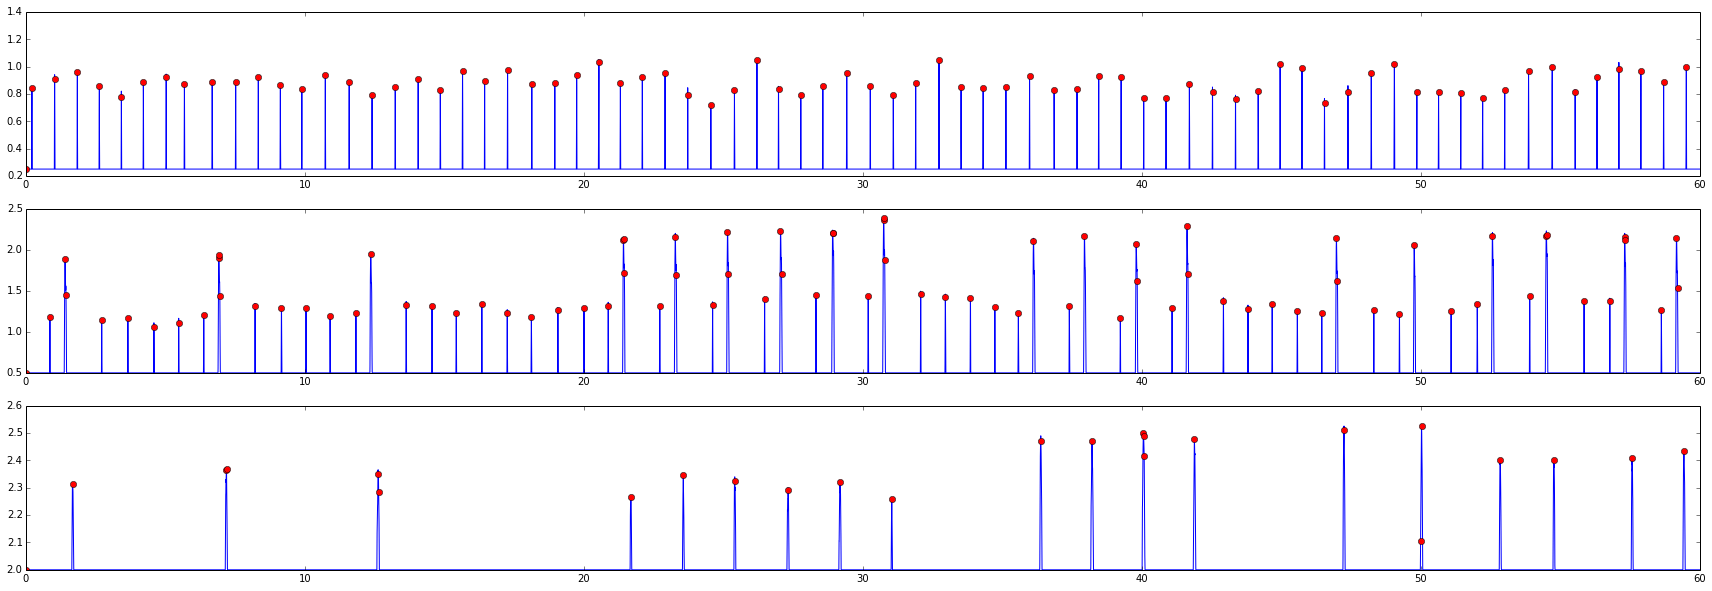

In [13]:
figure(figsize=(30,10))
subplot(3,1,1)
xlim(0,60)
plot (t1,new1)
plot(t1[p1],new1[p1],'ro')
subplot(3,1,2)
xlim(0,60)
plot(t2,new2a)
plot(t2[p2a],new2a[p2a],'ro')
subplot(3,1,3)
xlim(0,60)
plot(t2,new2b)
plot(t2[p2b],new2b[p2b],'ro')

#Prueba con seno de x

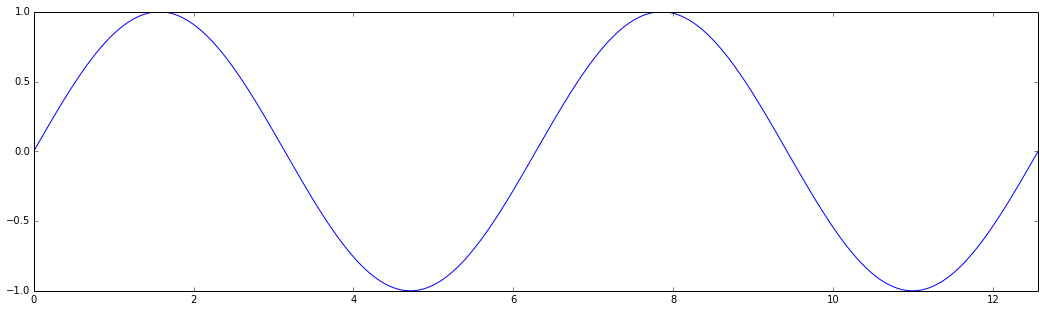

In [135]:
x=linspace(0,4*pi,10000)
y=sin(x)
figure(figsize=(18,5))
xlim(0,4*pi)
plot(x,y)

In [44]:
ar=arange(1,12,4)
p=find_peaks_cwt(y,ar)#, max_distances=ar)
print x[p]
print len(x[p])

NameError: name 'x' is not defined

##Bibliografía:
+ A. J. Vander, «Cardiovascular Physiology,» de
Vander's Human Physiology: The Mechanisms of Body 
Function, New York, McGraw Hill, 2008, pp. 261-
266.